Exercise 1.2

In [86]:
import numpy as np
import math
import matplotlib.pyplot as plt

In our further analysis we want to compare with the analytical solution for D=1 and time points: 0.001, 0.01, 0.1, and 1. Hence, we set D=1. 

Discretize:

In [15]:
N = 50
delta_x = 1/50
delta_y = 1/50
discr_x = np.linspace(0, 1, N+1)
discr_y = np.linspace(0, 1, N+1)

delta_t = 1/10000


Check for stability of the, to be implemented, scheme: (using equation (8) of the assignment)

In [18]:
4*delta_t <= delta_x**2

True

Now, the program for the simulation of the two-dimensional time dependent diffusion
equation discretized using the explicit finite difference formulation from eq. (7):

In [125]:
def c_as_fun_of_(t): 
    c_old = np.zeros((N+1,N+1))
    c_old[50,:] = 1
    c_new = c_old.copy()
    theta = 0
    while theta < t:
        for i in range(1,N):
            for j in range(0,N+1):
                c_new[i,j] = c_old[i,j] + (delta_t/(delta_x**2))*(c_old[i,(j+1)%(N+1)] + c_old[i,(j-1)%(N+1)] + c_old[i-1,j] + c_old[i+1,j] - 4*c_old[i,j])
        c_old = c_new.copy()
        theta += delta_t
    return(c_new)

Comparison to analytical solution:

In [148]:
def analytical_sol(y,t):
    c = 0
    den = 2*np.sqrt(t)
    for i in range(0,10000):
        summand = math.erfc((1-y+2*i)/den) - math.erfc((1+y+2*i)/den)
        c += summand
    return(c)

In [149]:
#analytical solutions
yyy = np.linspace(0,1,100)
c_ana_0001 = [analytical_sol(y,0.001) for y in yyy]
c_ana_001 = [analytical_sol(y,0.01) for y in yyy]
c_ana_01 = [analytical_sol(y,0.1) for y in yyy]
c_ana_1 = [analytical_sol(y,1) for y in yyy]


In [128]:
#numerical solutions, (pick an arbitrary column because they are all the same anyway)
c_num_0001 = c_as_fun_of_(0.001)[:,20] 
c_num_001 = c_as_fun_of_(0.01)[:,20]
c_num_01 = c_as_fun_of_(0.1)[:,20]
c_num_1 =c_as_fun_of_(1)[:,20]

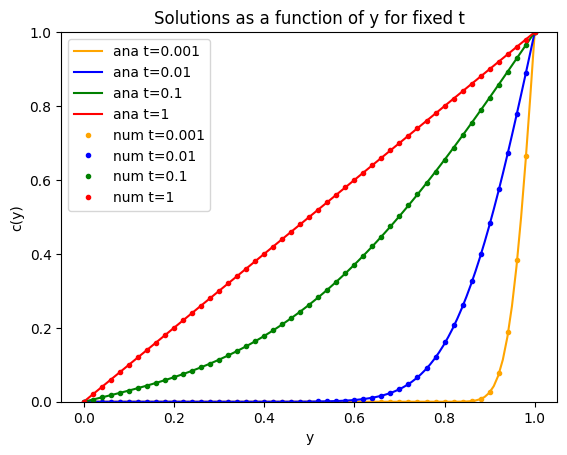

In [ ]:
#plot both in the same same figure for comparison. For t= 0.001, 0.01, 0.1 and 1.
plt.plot(yyy,c_ana_0001, color = 'orange',label = 'ana t=0.001')
plt.plot(yyy,c_ana_001, color = 'blue',label = 'ana t=0.01')
plt.plot(yyy,c_ana_01, color = 'green',label = 'ana t=0.1')
plt.plot(yyy,c_ana_1, color = 'red',label = 'ana t=1')
plt.plot(discr_y,c_num_0001,marker = 'o', linestyle="",color = 'orange',markersize = 3, label = 'num t=0.001')
plt.plot(discr_y,c_num_001,marker = 'o', linestyle="",color = 'blue',markersize = 3, label = 'num t=0.01')
plt.plot(discr_y,c_num_01,marker = 'o', linestyle="",color = 'green',markersize = 3,label = 'num t=0.1')
plt.plot(discr_y,c_num_1,marker = 'o', linestyle="",color = 'red',markersize = 3,label = 'num t=1')

plt.legend(loc = "upper left")
plt.ylim(0,1)
plt.xlabel('y')
plt.ylabel('c(y)')
plt.title("Solutions as a function of y for fixed t")

plt.show()

#just to be explicit: ana = analytical; num = numerical